In [1]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import os
import copy 
import json
import random
import numpy as np
import pandas as pd
from collections import Counter
from tqdm.notebook import tqdm

import seaborn as sns
sns.set()

# Load MAML Library

In [2]:
from main import run_training_wo_metatesting
from model import RegressorBN
from trainer import finetune_model
from utils import show_results

# Run metalearning experiments

In [3]:
test_num = 11
iter_num = 50000
K = 5
task_lr = 1e-3
meta_lr = 1e-3
seed = 0
description = "lib_random_seed_in_test_and_train_woBN_grads_cumulative_ADAMinner_clip10"
logname = "_".join(["test{}".format(test_num),
                    "{}Kiters".format(iter_num//1000),
                    "K{}".format(K),
                    "taskLR{}".format(str(task_lr)),
                    "metaLR{}".format(str(meta_lr)),
                    "seed{}".format(seed),
                    description])

meta_model = run_training_wo_metatesting(nepoch=iter_num, 
                                         logname=logname, 
                                         seed=seed)

Set seed for model:  0
Regressor(
  (layers): Sequential(
    (0): Sequential(
      (0): Linear(in_features=1, out_features=40, bias=True)
      (1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Linear(in_features=40, out_features=40, bias=True)
      (1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Linear(in_features=40, out_features=1, bias=True)
    )
  )
)
Elapsed time: 01h 33m 33s


In [3]:
test_num = 12
iter_num = 50000
K = 5
task_lr = 1e-3
meta_lr = 1e-3
seed = 0
description = "lib_random_seed_in_test_and_train_wBN_grads_cumulative_ADAMinner_clip10_coslr_scheduler"
logname = "_".join(["test{}".format(test_num),
                    "{}Kiters".format(iter_num//1000),
                    "K{}".format(K),
                    "taskLR{}".format(str(task_lr)),
                    "metaLR{}".format(str(meta_lr)),
                    "seed{}".format(seed),
                    description])

meta_model = run_training_wo_metatesting(nepoch=iter_num, 
                                         logname=logname, 
                                         seed=seed)

Set seed:  0
RegressorBN(
  (layers): Sequential(
    (0): Sequential(
      (0): Linear(in_features=1, out_features=40, bias=True)
      (1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Linear(in_features=40, out_features=40, bias=True)
      (1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Linear(in_features=40, out_features=1, bias=True)
      (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
)
Elapsed time: 01h 27m 20s


In [3]:
test_num = 13
iter_num = 50000
K = 5
task_lr = 1e-3
meta_lr = 1e-3
seed = 0
description = "lib_random_seed_in_test_and_train_wBN_grads_cumulative_ADAMinner_coslr_scheduler_wo_warmup"
logname = "_".join(["test{}".format(test_num),
                    "{}Kiters".format(iter_num//1000),
                    "K{}".format(K),
                    "taskLR{}".format(str(task_lr)),
                    "metaLR{}".format(str(meta_lr)),
                    "seed{}".format(seed),
                    description])

meta_model = run_training_wo_metatesting(nepoch=iter_num, 
                                         logname=logname, 
                                         seed=seed)

Set seed:  0
RegressorBN(
  (layers): Sequential(
    (0): Sequential(
      (0): Linear(in_features=1, out_features=40, bias=True)
      (1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Linear(in_features=40, out_features=40, bias=True)
      (1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Linear(in_features=40, out_features=1, bias=True)
      (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
)
Elapsed time: 01h 33m 30s


# Performance Evaluation

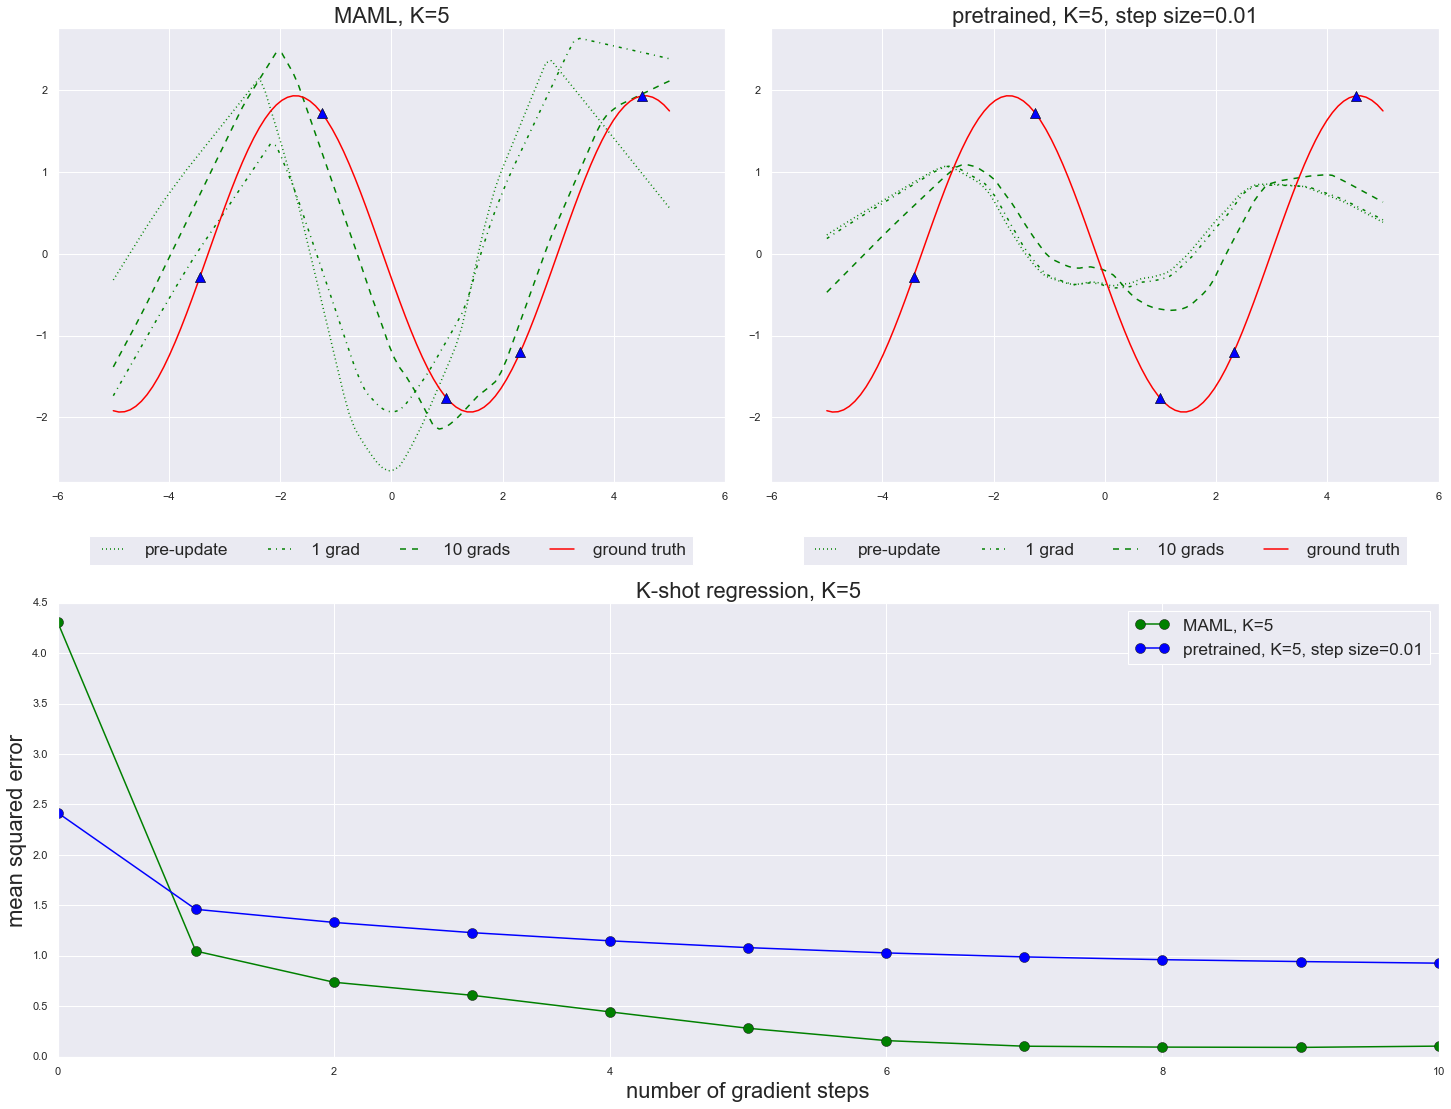

In [3]:
# lists for saving results
total_losses, total_results, total_inputs, total_outputs, total_xs, total_titles = [], [], [], [], [], []

# parameters
iter_num = 50000
epo = 10000
nepoch = 10
K = 5
lr = 0.01
modelclass = RegressorBN
seed = 42


# finetune MAML K=5 
pretrain_path = os.path.join(os.getcwd(),
                             "exps",
                             "test13_50Kiters_K5_taskLR0.001_metaLR0.001_seed0_lib_random_seed_in_test_and_train_wBN_grads_cumulative_ADAMinner_coslr_scheduler_wo_warmup",
                             "epo{}.pth".format(str(epo).zfill(len(str(iter_num)))))

losses, results, inputs, outputs, xs = finetune_model(modelclass=modelclass,
                                                      pretrain_path=pretrain_path,
                                                      lr=lr,
                                                      K=K,
                                                      nepoch=nepoch,
                                                      seed=seed,
                                                      verbose=False)

total_losses.append(losses)
total_results.append(results)
total_inputs.append(inputs)
total_outputs.append(outputs)
total_xs.append(xs)
total_titles.append("MAML, K={}".format(K))


# finetune pretrained baseline model 
pretrain_path = os.path.join(os.getcwd(),
                             "exps",
                             "test15_50Kiters_K5_taskLR0.001_metaLR0.001_seed0_pretrain_baseline_model_x25",
                             "epo{}.pth".format(str(epo).zfill(len(str(iter_num)))))

losses, results, inputs, outputs, xs = finetune_model(modelclass=modelclass,
                                                      pretrain_path=pretrain_path,
                                                      lr=lr,
                                                      K=K,
                                                      nepoch=nepoch,
                                                      seed=seed,
                                                      verbose=False)

total_losses.append(losses)
total_results.append(results)
total_inputs.append(inputs)
total_outputs.append(outputs)
total_xs.append(xs)
total_titles.append("pretrained, K={}, step size={:0.2f}".format(K, lr))

# show results
show_results(total_losses, total_results, total_inputs, total_outputs, total_xs, total_titles, 
             losstitle="K-shot regression, K={}".format(K))